# Ungraded Lab Part 1 - Deploying a Machine Learning Model

Bienvenido a este laboratorio no calificado.

En este laboratorio se trata de desplegar un modelo real de aprendizaje automático y comprobar qué se siente al hacerlo. Más concretamente, desplegarás un modelo de visión por ordenador entrenado para detectar objetos comunes en imágenes. El despliegue de un modelo es uno de los últimos pasos en el ciclo de vida de un prototipo de aprendizaje automático. Sin embargo, pensamos que sería emocionante que pudieras desplegar un modelo de inmediato. Este laboratorio utiliza un modelo preentrenado llamado [`YOLOV3`](https://pjreddie.com/darknet/yolo/). Este modelo es muy conveniente por dos razones: se ejecuta muy rápido, y para la detección de objetos produce resultados precisos.

La secuencia de pasos/tareas a completar en este laboratorio son los siguientes:
1. 1. Inspeccionar el conjunto de datos de la imagen utilizada para la detección de objetos.
2. 2. Examinar el propio modelo.
3. Despliegue el modelo utilizando fastAPI. Puedes consultar su página web [aquí](https://fastapi.tiangolo.com/).


Aquí tienes un [acceso directo](#instrucciones) a las instrucciones sobre cómo interactuar con tu modelo una vez desplegado. **Esto será útil más adelante, por ahora sólo continúe con el cuaderno como de costumbre.

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

## Detección de objetos con YOLOV3

### Inspección de las imágenes

Echemos un vistazo a las imágenes que se pasarán al modelo de YOLOV3. Esto nos permitirá saber qué tipo de objetos comunes están presentes para su detección. Estas imágenes forman parte del conjunto de datos [`ImageNet`](http://www.image-net.org/index) y están almacenadas en el directorio `images` dentro de este entorno.

In [11]:
from IPython.display import Image, display


Displaying image: apple.jpg


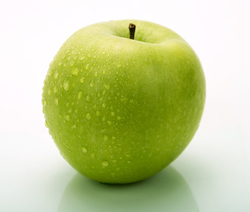


Displaying image: clock.jpg


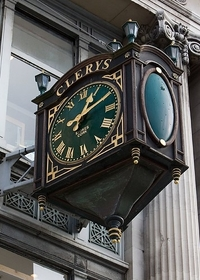


Displaying image: oranges.jpg


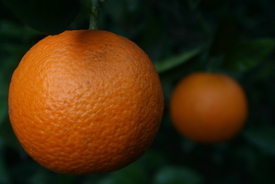


Displaying image: car.jpg


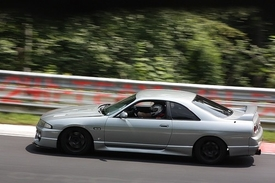

In [12]:
# Some example images
image_files = [
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
]

for image_file in image_files:
    print(f"\nDisplaying image: {image_file}")
    display(Image(filename=f"images/{image_file}"))

### Visión general del modelo

Ahora que tienes una idea de los datos de la imagen y de los objetos presentes, vamos a intentar ver si el modelo es capaz de detectarlos y clasificarlos correctamente.

Para ello utilizarás [`cvlib`](https://www.cvlib.net/), que es una librería muy sencilla pero potente para la detección de objetos que se nutre de [`OpenCV`](https://docs.opencv.org/4.5.1/) y [`Tensorflow`](https://www.tensorflow.org/).

Más concretamente, se utilizará la función [`detect_common_objects`](https://docs.cvlib.net/object_detection/), que toma una imagen formateada como un [`numpy array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) y devuelve:


Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator
- `bbox`: lista de la lista que contiene las coordenadas del cuadro delimitador de los objetos detectados. 

        Ejemplo:
    
    ```python
        [[32, 76, 128, 192], [130, 83, 220, 185]]
    ```
    

- `label`: lista de etiquetas de los objetos detectados.
    
        Ejemplo:
    ```python
        ['apple', 'apple']
    ```


- `conf`: lista de puntuaciones de confianza de los objetos detectados.
        Ejemplo:
        
    ```python
        [0.6187325716018677, 0.42835739254951477]
    ```
    
En la siguiente sección verá estos elementos en acción.

### Creación de la función detect_and_draw_box

Vamos a definir la función `detect_and_draw_box` que toma como argumentos de entrada 

- el **nombre del fichero** de un fichero de tu sistema
- un **modelo**
- un **nivel de confianza**. 

Con estas entradas, detecta los objetos comunes en la imagen y guarda una nueva imagen que muestra las cajas delimitadoras junto al objeto detectado. Estas nuevas imágenes se guardarán en el directorio `images_with_boxes`.

Puede preguntarse por qué esta función recibe el modelo como argumento de entrada. ¿Qué modelos hay para elegir? La respuesta es que `detect_common_objects` utiliza el modelo `yolov3` por defecto.  Sin embargo, hay otra opción disponible que es mucho más pequeña y requiere menos potencia de cálculo. 

Se trata de la versión `yolov3-tiny`. Como el nombre del modelo indica, este modelo está diseñado para entornos limitados que no pueden almacenar modelos grandes. Esto conlleva una contrapartida natural: los resultados son menos precisos que los del modelo completo. Sin embargo, sigue funcionando bastante bien. A partir de ahora puedes utilizar el que prefieras, pero por defecto se utilizará `yolov3-tiny`.

La salida del modelo es un vector de probabilidades para la presencia de diferentes objetos en la imagen. El último argumento de entrada, el nivel de confianza, determina el umbral que debe superar la probabilidad para informar de que se ha detectado un objeto determinado en la imagen suministrada. Por defecto, `detect_common_objects` utiliza un valor de 0,5 para esto.

In [13]:
!python -m pip install cvliv

/usr/bin/python: No module named pip


In [14]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox


def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.5):
    """Detects common objects on an image and creates a new image with bounding boxes.

    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    """
    
    # Images are stored under the images/ directory
    img_filepath = f'images/{filename}'
    
    # Read the image into a numpy array
    img = cv2.imread(img_filepath)
    
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    
    # Print current image's filename
    print(f"========================\nImage processed: {filename}\n")
    
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}\n")
    
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    
    # Save the image in the directory images_with_boxes
    cv2.imwrite(f'images_with_boxes/{filename}', output_image)
    
    # Display the image with bounding boxes
    display(Image(f'images_with_boxes/{filename}'))

Let's try it out for the example images.

apple.jpg
Image processed: apple.jpg

Detected object: apple with confidence level of 0.5717206597328186



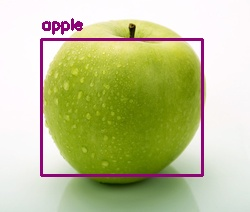

clock.jpg
Image processed: clock.jpg

Detected object: clock with confidence level of 0.9683184623718262



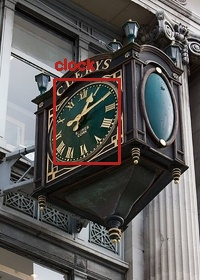

oranges.jpg
Image processed: oranges.jpg

Detected object: orange with confidence level of 0.6185588836669922

Detected object: orange with confidence level of 0.5561690330505371



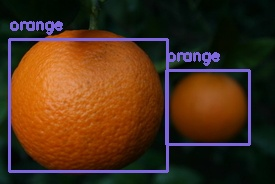

car.jpg
Image processed: car.jpg

Detected object: car with confidence level of 0.6325406432151794



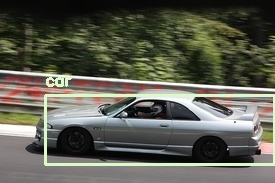

In [15]:
for image_file in image_files:
    print(image_file)
    detect_and_draw_box(image_file)

## Changing the confidence level

Looks like the object detection went fairly well. Let's try it out on a more difficult image containing several objects:

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818482041358948

Detected object: orange with confidence level of 0.5346484184265137

Detected object: orange with confidence level of 0.515099287033081



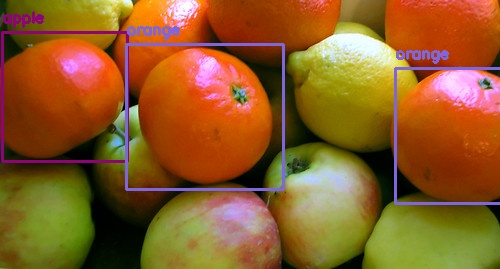

In [16]:
detect_and_draw_box("fruits.jpg")

El **modelo no detectó** varias frutas y **clasificó erróneamente** una naranja como una manzana. Esto puede parecer extraño, ya que antes fue capaz de detectar una manzana, por lo que se podría pensar que el modelo tiene una representación justa del aspecto de una manzana.

Una posibilidad es que el modelo haya detectado las otras frutas, pero con un nivel de confianza inferior a 0,5. Probemos si esta es una hipótesis válida:

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818482041358948

Detected object: orange with confidence level of 0.5346484184265137

Detected object: orange with confidence level of 0.515099287033081

Detected object: apple with confidence level of 0.34759870171546936

Detected object: orange with confidence level of 0.32876086235046387

Detected object: apple with confidence level of 0.31244686245918274

Detected object: orange with confidence level of 0.27986079454421997

Detected object: orange with confidence level of 0.2749977707862854

Detected object: apple with confidence level of 0.2744504511356354

Detected object: orange with confidence level of 0.21419058740139008



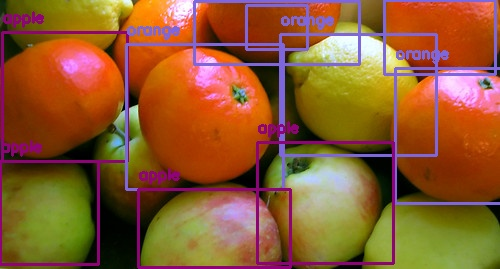

In [17]:
detect_and_draw_box("fruits.jpg", confidence=0.2)

Al bajar el nivel de confianza, el modelo detecta con éxito la mayoría de las frutas. Sin embargo, para detectar correctamente los objetos presentes, tuvimos que fijar el nivel de confianza muy bajo. En general, hay que tener cuidado a la hora de disminuir o aumentar este tipo de parámetros, ya que su modificación podría producir resultados no deseados.

En cuanto a este ejemplo concreto en el que se clasificó erróneamente una naranja como una manzana, **sirve para recordar que estos modelos no son perfectos y que hay que tenerlo en cuenta a la hora de utilizarlos para tareas en producción**.

## Despliegue del modelo mediante fastAPI


### Colocando tu modelo de detección de objetos en un servidor

Ahora que ya sabes cómo funciona el modelo, ¡es el momento de desplegarlo! ¿No estás emocionado? :)

Antes de entrar en el despliegue, vamos a recapitular rápidamente algunos conceptos importantes y cómo se traducen a `fastAPI`. Las imágenes que se suben al servidor se utilizarán dentro del directorio `images_uploaded`.


### Algunas aclaraciones de conceptos

#### Modelo cliente-servidor

Cuando se habla de **desplegar**, lo que se suele querer decir es poner todo el software necesario para la predicción en un `servidor`. Al hacer esto, un `cliente` puede interactuar con el modelo enviando `solicitudes` al servidor. 

Esta interacción cliente-servidor está fuera del alcance de este cuaderno pero hay muchos recursos en internet que puedes utilizar para entenderlo mejor.

Lo importante es que el modelo de aprendizaje automático vive en un servidor esperando que los clientes envíen solicitudes de predicción. El cliente debe proporcionar la información requerida que el modelo necesita para hacer una predicción. Hay que tener en cuenta que es habitual que se realicen muchas predicciones por lotes en una sola petición. El servidor utilizará la información proporcionada para devolver las predicciones al cliente, que podrá utilizarlas a su antojo.

Empecemos creando una instancia de la clase `FastAPI`:

```python
app = FastAPI()
```

El siguiente paso es usar esta instancia para crear endpoints que manejen la lógica para la predicción (más sobre esto a continuación). Una vez que todo el código está en su lugar para ejecutar el servidor sólo tiene que utilizar el comando:

```python
uvicorn.run(app)
```

Su API está codificada usando fastAPI pero el servicio se hace usando [`uvicorn`](https://www.uvicorn.org/), que es una implementación realmente rápida de la Interfaz de Pasarela de Servidores Asíncronos (ASGI). Ambas tecnologías están estrechamente interconectadas y no es necesario entender los detalles de la implementación. Saber que uvicorn maneja el servicio es suficiente para el propósito de este laboratorio.

#### Endpoints

Y usted puede alojar varios modelos de aprendizaje automático en el mismo servidor. Para que esto funcione, puedes asignar un `endpoint` diferente a cada modelo para que siempre sepas qué modelo se está utilizando. Un punto final está representado por un patrón en la "URL". Por ejemplo, si tienes un sitio web llamado `myawesomemodel.com` podrías tener tres modelos diferentes en los siguientes endpoints:

- `myawesomemodel.com/count-cars/`
- `myawesomemodel.com/count-apples/`
- `myawesomemodel.com/count-plants/`

Cada modelo haría lo que el patrón del nombre sugiere.

En fastAPI se define un endpoint creando una función que se encargará de toda la lógica de ese endpoint y [decorando](https://www.python.org/dev/peps/pep-0318/) con una función que contiene información sobre el método HTTP permitido (más sobre esto a continuación) y el patrón en la URL que utilizará.

El siguiente ejemplo muestra cómo permitir una petición HTTP GET para el endpoint "/mi-endpoint":

```python
@app.get("/my-endpoint")
def handle_endpoint():
    ...
    ...
```


#### Peticiones HTTP

El cliente y el servidor se comunican entre sí a través de un protocolo llamado `HTTP`. El concepto clave aquí es que esta comunicación entre el cliente y el servidor utiliza algunos verbos para denotar acciones comunes. Dos verbos muy comunes son

- `GET` -> Recupera información del servidor.
- `POST` -> Proporciona información al servidor, que éste utiliza para responder.

Si su cliente hace una `GET request` a un endpoint de un servidor obtendrá cierta información de este endpoint sin necesidad de proporcionar información adicional. En el caso de una `Post request` le estás diciendo explícitamente al servidor que le vas a proporcionar alguna información que debe ser procesada de alguna manera.

Las interacciones con los modelos de Aprendizaje Automático que viven en los endpoints se hacen normalmente a través de una `solicitud POST` ya que se necesita proporcionar la información que se requiere para calcular una predicción.

Echemos un vistazo a una petición POST:

```python
@app.post("/my-other-endpoint")
def handle_other_endpoint(param1: int, param2: str):
    ...
    ...

```

En el caso de las peticiones POST, la función manejadora contiene parámetros. A diferencia de GET, las peticiones POST esperan que el cliente le proporcione alguna información. En este caso suministramos dos parámetros: un entero y una cadena.


### ¿Por qué fastAPI?

Con fastAPI puedes crear servidores web para alojar tus modelos muy fácilmente. Además, esta plataforma es extremadamente rápida y **tiene un cliente incorporado que se puede utilizar para interactuar con el servidor**. Para utilizarlo tendrás que visitar el endpoint "/docs", verás cómo hacerlo más adelante. ¿No es conveniente?

Basta de cháchara, ¡continuemos!

In [18]:
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

In [19]:
# Assign an instance of the FastAPI class to the variable "app".
# You will interact with your api using this instance.
app = FastAPI(title='Deploying a ML Model with FastAPI')

# List available models using Enum for convenience. This is useful when the options are pre-defined.
class Model(str, Enum):
    yolov3tiny = "yolov3-tiny"
    yolov3 = "yolov3"


# By using @app.get("/") you are allowing the GET method to work for the / endpoint.
@app.get("/")
def home():
    return "Congratulations! Your API is working as expected."


# This endpoint handles all the logic necessary for the object detection to work.
# It requires the desired model and the image in which to perform object detection.
@app.post("/predict") 
def prediction(model: Model, file: UploadFile = File(...)):

    # 1. VALIDATE INPUT FILE
    filename = file.filename
    fileExtension = filename.split(".")[-1] in ("jpg", "jpeg", "png")
    if not fileExtension:
        raise HTTPException(status_code=415, detail="Unsupported file provided.")
    
    # 2. TRANSFORM RAW IMAGE INTO CV2 image
    
    # Read image as a stream of bytes
    image_stream = io.BytesIO(file.file.read())
    
    # Start the stream from the beginning (position zero)
    image_stream.seek(0)
    
    # Write the stream of bytes into a numpy array
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    
    # Decode the numpy array as an image
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    
    
    # 3. RUN OBJECT DETECTION MODEL
    
    # Run object detection
    bbox, label, conf = cv.detect_common_objects(image, model=model)
    
    # Create image that includes bounding boxes and labels
    output_image = draw_bbox(image, bbox, label, conf)
    
    # Save it in a folder within the server
    cv2.imwrite(f'images_uploaded/{filename}', output_image)
    
    
    # 4. STREAM THE RESPONSE BACK TO THE CLIENT
    
    # Open the saved image for reading in binary mode
    file_image = open(f'images_uploaded/{filename}', mode="rb")
    
    # Return the image as a stream specifying media type
    return StreamingResponse(file_image, media_type="image/jpeg")

Al ejecutar la siguiente celda, ¡hará girar el servidor!

Esto hace que el portátil se bloquee (no se puede ejecutar ninguna celda/código) hasta que interrumpas manualmente el núcleo. Puedes hacer esto haciendo clic en la pestaña `Kernel` y luego en `Interrumpir`. También puedes entrar en el modo de comandos de Jupyter pulsando la tecla `ESC` y tocando dos veces la tecla `I`.

In [ ]:
# Allows the server to be run in this interactive environment
nest_asyncio.apply()

# This is an alias for localhost which means this particular machine
host = "127.0.0.1"

# Spin up the server!    
uvicorn.run(app, host=host, port=8000, root_path="/")

INFO:     Started server process [13125]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:57190 - "GET // HTTP/1.1" 200 OK
INFO:     127.0.0.1:57192 - "GET //docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:57192 - "GET //openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:57234 - "POST //predict?model=yolov3-tiny HTTP/1.1" 200 OK


The server is now running! Nice job!

## Consume your service

Normally you will now head over to `http://127.0.0.1:8000/` to see it in action. However Coursera environment works somewhat different to a regular pc. Within this environment you need to interact with the service through the navigation bar, which can be found in the upper side of your screen:

<table><tr><td><img src='assets/notebook_path.png'></td></tr></table>

If you don't see this bar you might need to click on the `Navigate` button first:


<table><tr><td><img src='assets/navigate.png'></td></tr></table>

### Come back to this notebook

To come back you have two alternatives:

- Click the `Home` button at the left side of the navigation bar. 


- Type `/notebooks/server.ipynb` in the navigation bar and press enter.

### Visit the server

You can think of `/server/` as an alias for `http://127.0.0.1:8000/`.

With this in mind, to interact with the server you need to type `/server/` in this bar and press enter.

This will take you to the `/` endpoint of the server, which should display the message `Congratulations! Your API is working as expected`.


## Using fastAPI's integrated client

To actually use your server for image detection you can leverage the client that comes built-in with fastAPI. 

**To use this client type `/server/docs` in the navigation bar and press enter.**

<table><tr><td><img src='assets/serve_docs.png'></td></tr></table>

Try submitting an image and see how your API is able to detect objects within it and return a new image containing the bounding boxes alongside the labels of the detected objects.

When doing so you will get a screen that should look like the one below, follow the instructions next:

<a name='instructions'></a>
## Instructions to use the client

**Note:** If you need to come back to this notebook to check these instructions you can do so as explained earlier. Remember that at the top of the notebook there is a shortcut to this section so you don't have to scroll all the way.

Click on top of the `/predict` endpoint and more options will become visible:

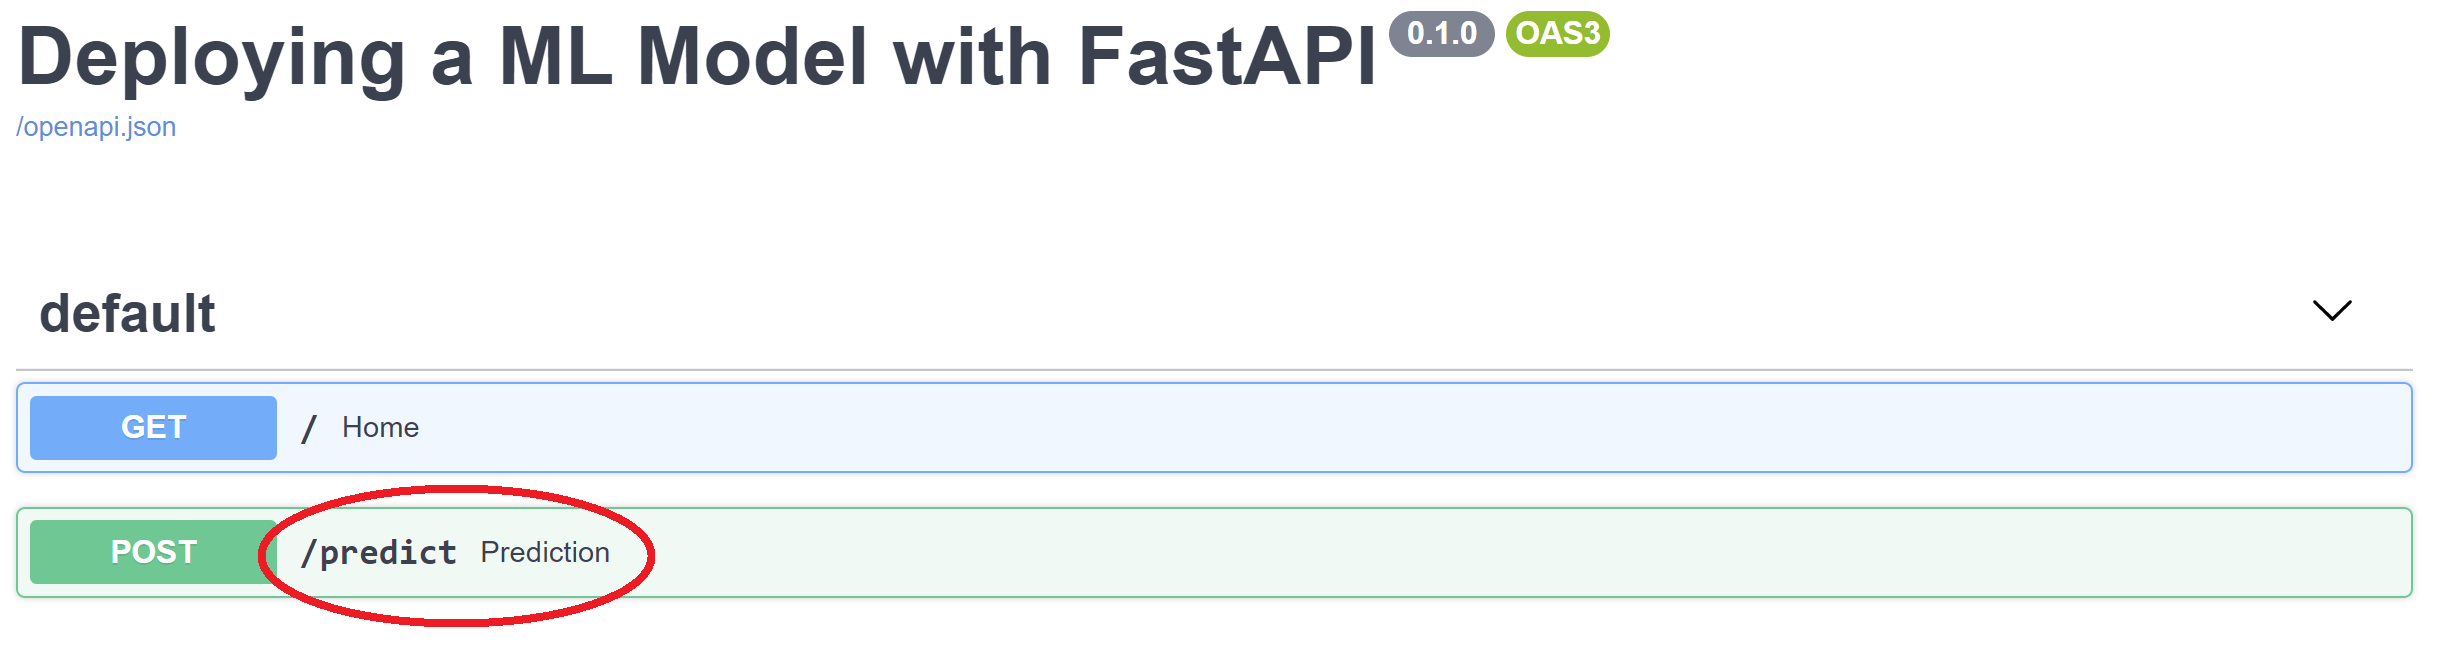



To test your server click on the **Try it out** button.

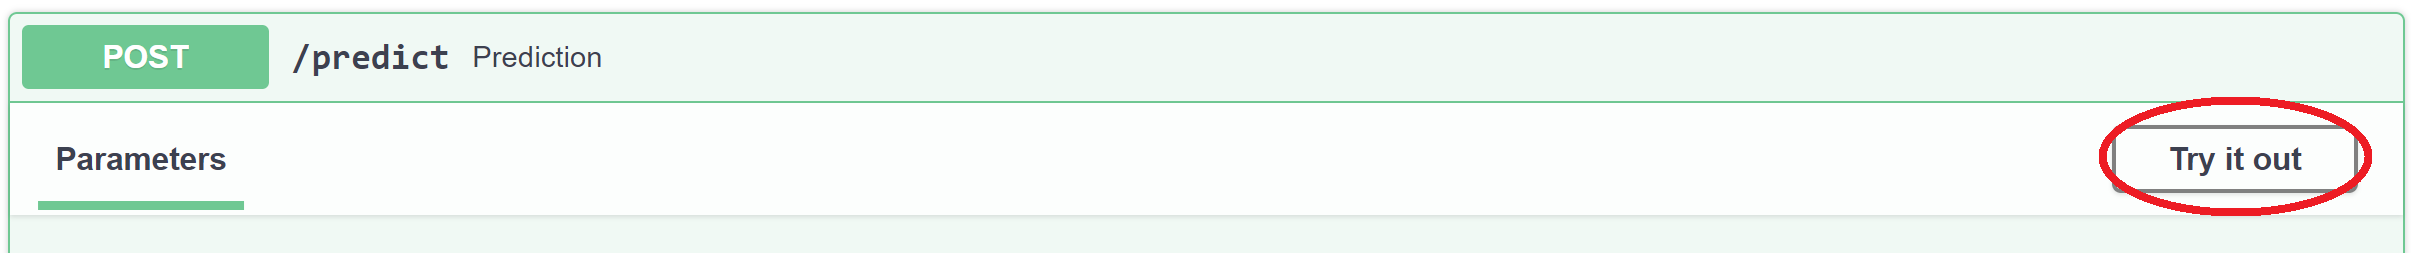

You can choose a model from the **model** field and a **file** which should be the image in which you want the server to detect objects.

**Submit an image** from your local filesystem by clicking the **Choose File** button, then click on the blue **Execute** button to send an HTTP request to the server. After doing so, **scroll down and you will see the response from it**. Pretty cool, right?

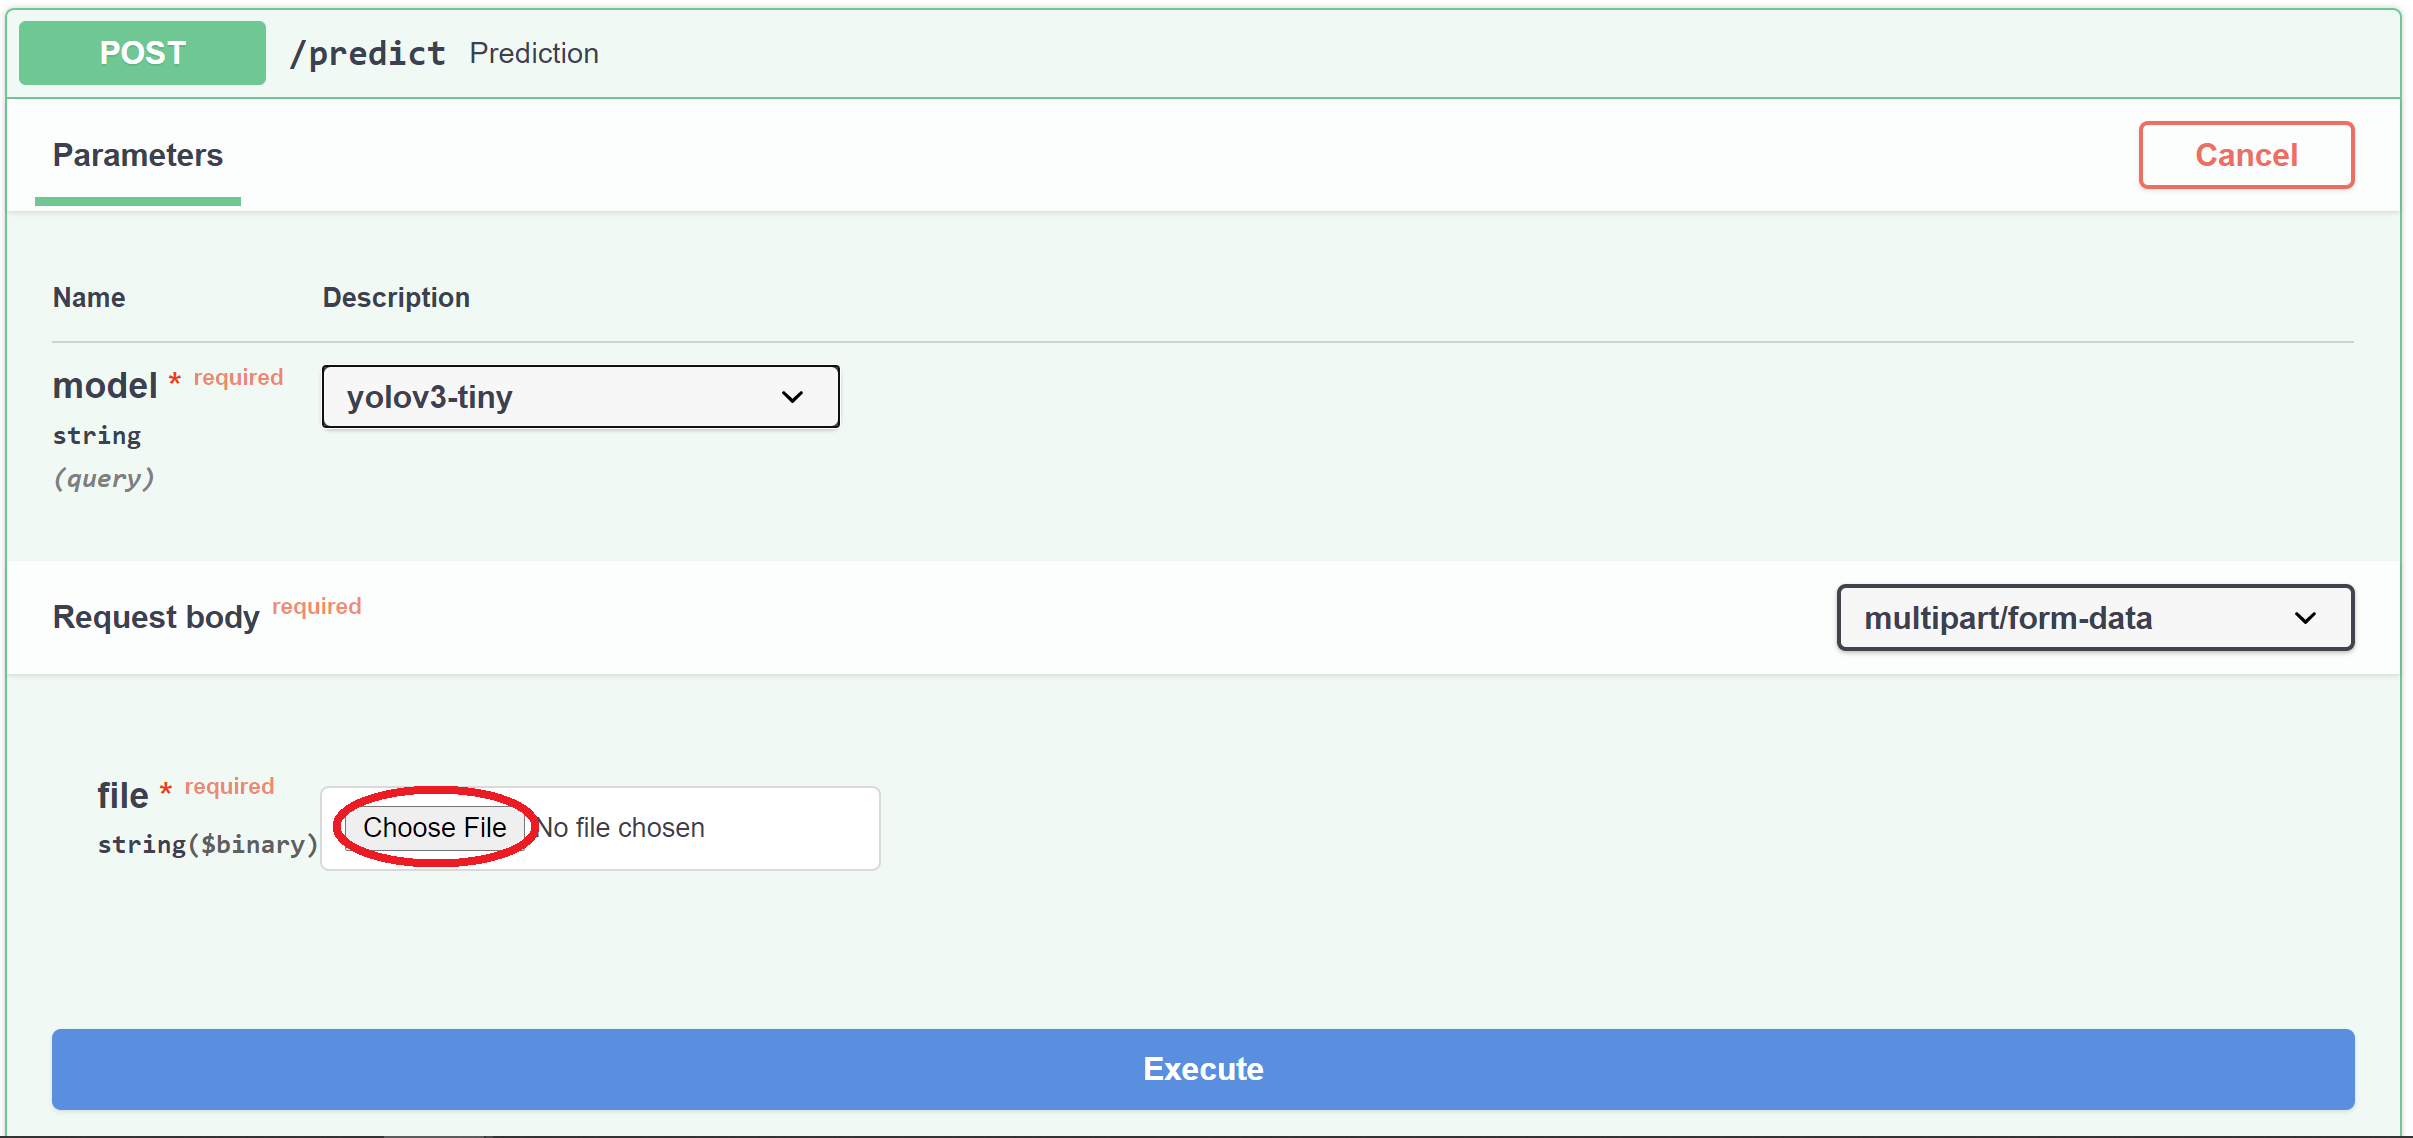

**Try different images!** You can use the ones we provided with this lab or some of your own. Since the model is using the default confidence level of 0.5 it might not always succeed to detect some objects. 

To download the images provided with lab follow these steps:

- Click on the Jupyter logo in the upper left side of the screen. This will take you to the Jupyter filesystem.


- Go into the `images` directory.


- Here you can select any image and then click on the download button to download it.

Also, try submitting non-image files and see how the server reacts to it.

## Congratulations on finishing this ungraded lab!

Real life servers have a lot more going on in terms of security and performance. However, the code you just experienced is close to what you see in real production environments. Hopefully, this lab served the purpose of increasing your familiarity with the process of deploying a Deep Learning model, and consuming from it.

**Keep it up!**

## Consuming your model from another client

It is awesome that fastAPI allows you to interact with your API through its built-in client. However, you might wonder how you can interact with your API using regular code and not some UI.

There is a bonus section which shows how to code a minimal client in Python. This is useful to break down (in a very high level) what fastAPI's client is doing under the hood. However this section cannot be used within Coursera's environment. For this reason consider checking out the version of this lab that is meant to be run within your local computer. You can find it [here](https://github.com/https-deeplearning-ai/machine-learning-engineering-for-production-public/tree/main/course1/week1-ungraded-lab).